# Chicago Beach Water Quality Analysis -2

# <b>Data Exploration<b>

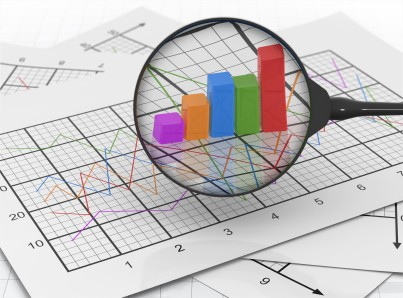

The objective of this lab are
- Getting familarity with data exploration techniques
- Usage of Python libraries available for data exploration & visualizations

<b> Problem Understanding</b>

The Chicago Park District maintains sensors in the water at beaches along Chicago's Lake Michigan lakefront. These sensors generally capture the indicated measurements hourly while the sensors are in operation during the summer. During other seasons and at some other times, information from the sensors may not be available. The sensor locations change with the Park District’s operational needs, primarily related to water quality.

You have appointed as analyst who can help the local body to investigate more through the data acuired as a part of this setup. You need to help the department to go through this dataset carefully and check for the quality issues present in the data, fix them with appropriate methods and make the dataset ready for the further analysis.

In this exercise, we will utilise several techniques such as <br>
- Outlier analysis
- Normalization
- Univariate analysis
- Bivariate analysis
- Correlation
- Visualizations

<b>(A) Import the required data

We already have prepared our data in earlier exercise, lets import it. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("cleaned_beach_water_data.csv")

In [14]:
#Make a copy of the data
df = data

Lets quickly explore it to get more understanding about structure of data.

In [15]:
df.shape

(34917, 9)

In [16]:
df.columns

Index(['Unnamed: 0', 'beach_name', 'timestamp', 'temp', 'turbidity',
       'wave_height', 'wave_period', 'battery_life', 'measurement_id'],
      dtype='object')

In [17]:
df.dtypes

Unnamed: 0          int64
beach_name          int64
timestamp          object
temp              float64
turbidity         float64
wave_height       float64
wave_period       float64
battery_life      float64
measurement_id     object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      34917 non-null  int64  
 1   beach_name      34917 non-null  int64  
 2   timestamp       34917 non-null  object 
 3   temp            34917 non-null  float64
 4   turbidity       34917 non-null  float64
 5   wave_height     34917 non-null  float64
 6   wave_period     34917 non-null  float64
 7   battery_life    34917 non-null  float64
 8   measurement_id  34917 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 2.4+ MB


In [19]:
df.head()

,Unnamed: 0,beach_name,timestamp,temp,turbidity,wave_height,wave_period,battery_life,measurement_id
0,0,0,2013-08-30 08:00:00,20.3,1.18,0.080,3.0,9.4,MontroseBeach201308300800
1,1,2,2016-05-26 13:00:00,14.4,1.23,0.111,4.0,12.4,OhioStreetBeach201605261300
2,2,1,2013-09-03 16:00:00,23.2,3.63,0.174,6.0,9.4,CalumetBeach201309031600
3,3,1,2014-05-28 12:00:00,16.2,1.26,0.147,4.0,11.7,CalumetBeach201405281200
4,4,0,2014-05-28 12:00:00,14.4,3.36,0.298,4.0,11.9,MontroseBeach201405281200


In [20]:
df = df[['beach_name','beach_name','timestamp','temp','turbidity','wave_height','wave_period', 'battery_life']]

In [21]:
df.head()

,beach_name,beach_name,timestamp,temp,turbidity,wave_height,wave_period,battery_life
0,0,0,2013-08-30 08:00:00,20.3,1.18,0.080,3.0,9.4
1,2,2,2016-05-26 13:00:00,14.4,1.23,0.111,4.0,12.4
2,1,1,2013-09-03 16:00:00,23.2,3.63,0.174,6.0,9.4
3,1,1,2014-05-28 12:00:00,16.2,1.26,0.147,4.0,11.7
4,0,0,2014-05-28 12:00:00,14.4,3.36,0.298,4.0,11.9


In [11]:
df.tail(30)

,beach_name,beach_name,timestamp,turbidity,wave_height,wave_period,battery_life
34887,2,2,2017-09-11 11:00:00,2.47,0.187,3.0,10.6
34888,2,2,2017-09-11 12:00:00,2.54,0.187,3.0,10.6
34889,2,2,2017-09-11 13:00:00,2.57,0.187,3.0,10.6
34890,2,2,2017-09-11 14:00:00,2.60,0.187,3.0,10.6
34891,2,2,2017-09-11 15:00:00,2.58,0.187,3.0,10.6
34892,2,2,2017-09-11 16:00:00,2.45,0.187,3.0,10.6
34893,2,2,2017-09-11 17:00:00,2.47,0.187,3.0,10.6
34894,2,2,2017-09-11 18:00:00,2.61,0.187,3.0,10.6
34895,2,2,2017-09-11 19:00:00,2.60,0.187,3.0,10.6
34896,2,2,2017-09-11 20:00:00,2.64,0.187,3.0,10.5


<b> B. Data Understanding

Lets spend some time to look at unique values and count of those values for each attributes.

In [8]:
df.beach_name.value_counts()

beach_name
2    9342
1    7569
0    7268
4    4022
3    3419
5    3297
Name: count, dtype: int64

Only six beaches are observed!

In [12]:
df.timestamp.value_counts()

timestamp
2015-08-12 19:00:00    6
2015-07-03 17:00:00    6
2015-07-04 20:00:00    6
2015-07-04 21:00:00    6
2015-07-05 21:00:00    6
                      ..
2017-06-10 21:00:00    1
2017-06-10 22:00:00    1
2017-06-10 23:00:00    1
2017-06-11 00:00:00    1
2017-09-12 18:00:00    1
Name: count, Length: 10796, dtype: int64

Lot much measurements available for timestamp! May be further extracted out into separate columns.

In [22]:
df.temp.value_counts()

temp
22.8    437
20.3    403
23.1    394
18.0    392
22.7    392
       ... 
31.4      1
29.0      1
29.6      1
31.5      1
27.2      1
Name: count, Length: 195, dtype: int64

Too many temp values, may be divided into groups and converted to categories.

In [23]:
df.turbidity.value_counts()

turbidity
0.00      2367
0.79       178
0.74       177
1.01       174
1.13       171
          ... 
13.89        1
671.41       1
121.83       1
19.15        1
27.55        1
Name: count, Length: 2616, dtype: int64

Too many turbidity values, may be divided into groups and converted to categories.

In [24]:
df.wave_height.value_counts()

wave_height
 0.187        2814
-99999.992     526
 0.105         259
 0.107         255
 0.110         253
              ... 
 0.522           1
 0.585           1
 0.577           1
 0.770           1
 0.658           1
Name: count, Length: 594, dtype: int64

Too many wave_height values, may be divided into groups and converted to categories.

In [25]:
df.wave_period.value_counts()

wave_period
 3.000000         14239
 4.000000          8239
 2.000000          3997
 5.000000          2798
 6.000000          2148
 7.000000          1298
 8.000000           613
-100000.000000      526
 9.000000           515
 10.000000          279
-1512.482041        227
 1.000000            38
Name: count, dtype: int64

wave_period has limited values so can be used for groupbys.

In [26]:
df.battery_life.value_counts()

battery_life
10.8    2395
10.7    2166
11.0    2104
10.9    2061
11.3    1985
        ... 
7.6        2
8.3        2
5.0        2
7.5        1
4.9        1
Name: count, Length: 86, dtype: int64

Too many battery_life values, may be divided into groups and converted to categories.

<b> C. Measures of center and spread

Lets explore numerics for the measures of center and spread.

In [27]:
df.describe()

,beach_name,beach_name,temp,turbidity,wave_height,wave_period,battery_life
count,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000
mean,1.978492,1.978492,19.363387,4.823575,-1516.116166,-1512.482041,11.038205
std,1.567630,1.567630,3.356908,33.506600,12180.456214,12180.906771,0.771769
min,0.000000,0.000000,0.000000,0.000000,-99999.992000,-100000.000000,4.800000
25%,1.000000,1.000000,17.100000,0.660000,0.109000,3.000000,10.600000
50%,2.000000,2.000000,19.600000,1.260000,0.154000,3.000000,11.000000
75%,3.000000,3.000000,22.000000,2.540000,0.200000,4.000000,11.500000
max,5.000000,5.000000,31.500000,1683.480000,1.467000,10.000000,13.300000


- Temperatures value check <br>
Min to first quartile values magnitude looks big as compared to Q1 to Q2 and Q2 to Q3 spread. Same is applicable for Q3 to Max value range. Overall values looks be in a range. 

- Turbidity value check<br>
Overall values looks uniformly distributed only max value seems to be extremely large as compared other values. 

- wave_height values check <br>
Overall values looks uniformly distributed only min value seems to be extremely small as compared other values.

- wave_period values check <br>
Overall values looks uniformly distributed only min value seems to be extremely small as compared other values.

- battery_life values check <br>
Overall values looks uniformly distributed

<br> <b>D. Checking for outliers

Lets check the distribution of data more closely to identify the presense of outliers.

In [29]:
# Checking for outliers in the continuous variables
num_df = df[['temp','turbidity','wave_height','wave_period', 'battery_life']]

In [30]:
# Checking outliers at 5%,25%,50%,75%,90%,95% and 99%
num_df.describe(percentiles=[0.05, .25,.5,.75,.90,.95,.99])

,temp,turbidity,wave_height,wave_period,battery_life
count,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000
mean,19.363387,4.823575,-1516.116166,-1512.482041,11.038205
std,3.356908,33.506600,12180.456214,12180.906771,0.771769
min,0.000000,0.000000,-99999.992000,-100000.000000,4.800000
5%,13.600000,0.000000,0.070000,2.000000,10.000000
25%,17.100000,0.660000,0.109000,3.000000,10.600000
50%,19.600000,1.260000,0.154000,3.000000,11.000000
75%,22.000000,2.540000,0.200000,4.000000,11.500000
90%,23.500000,6.140000,0.286000,6.000000,11.900000
95%,24.100000,12.750000,0.345000,7.000000,12.200000


Observations <br>
- temp values looks spread in uniform manner
- turbidity values also looks looks spread in uniform manner till 90% percentile but increasing rapidly after that and max value is too high
- wave_height values also looks looks spread in uniform manner except min value
- wave_period values also looks looks spread in uniform manner except min value
- battery_life values looks spread in uniform manner

Outliers seems to be present in turbidity, wave_height and wave_period columns, lets confirm it by visualization.

In [18]:
!pip3 install matplotlib --quiet

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


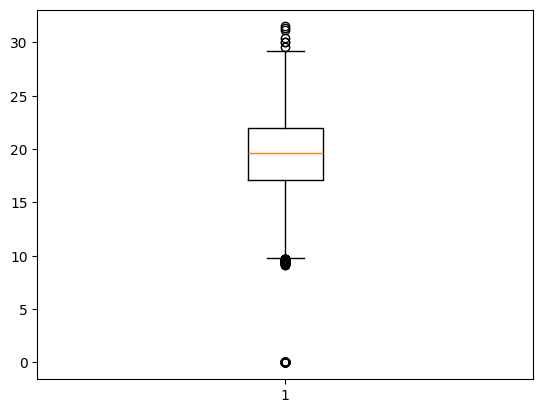

In [31]:
import matplotlib.pyplot as plt

# Boxplot: Visualise the distribution of a continuous variable
plt.boxplot(df['temp'])
plt.show()

In [20]:
!pip3 install seaborn --quiet

C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='temp'>

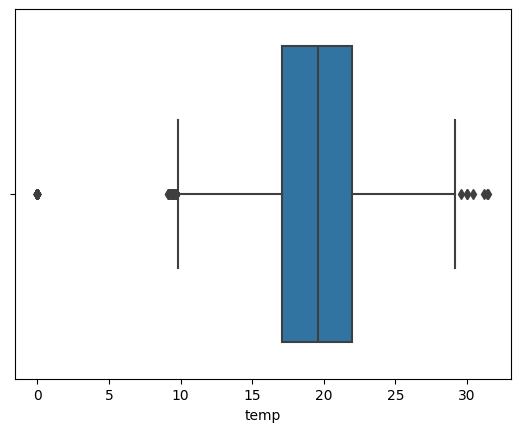

In [32]:
#Another library for statistical visualizations
#seaborn not installed in Anaconda distribution, need to execute following to install it
#!pip install seaborn
import seaborn as sns
sns.boxplot(x=df['temp'])

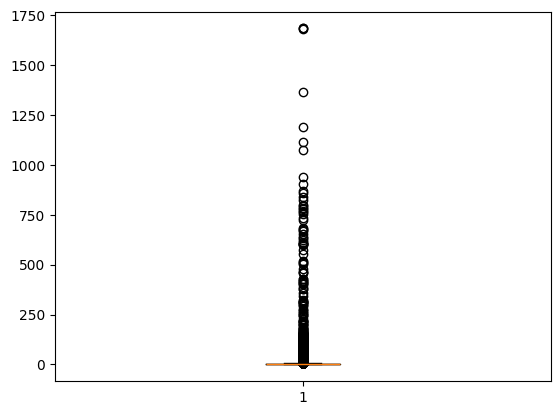

C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='turbidity'>

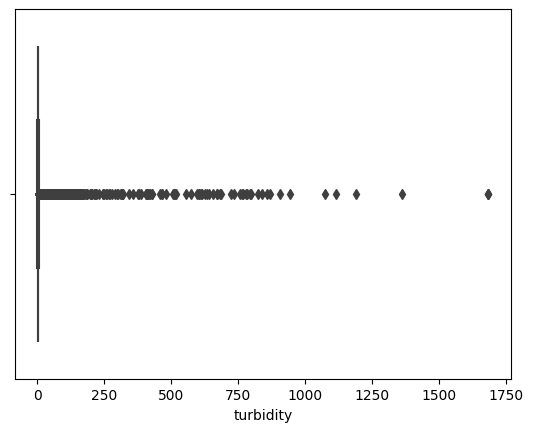

In [33]:
# Boxplot: Visualise the distribution of a continuous variable
plt.boxplot(df['turbidity'])
plt.show()
sns.boxplot(x=df['turbidity'])

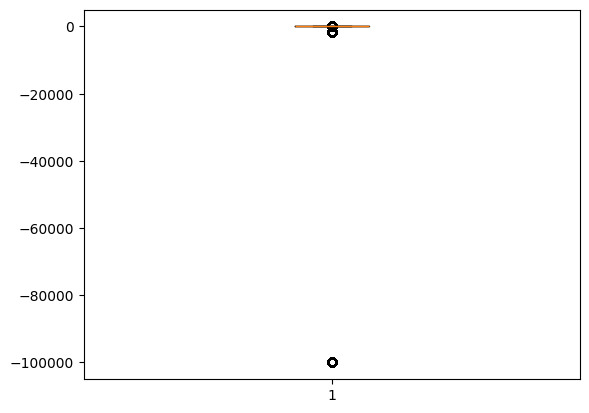

In [34]:
# Boxplot: Visualise the distribution of a continuous variable
plt.boxplot(df['wave_height'])
plt.show()

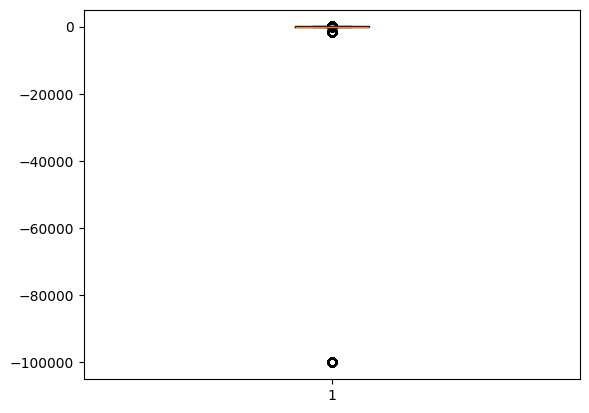

In [35]:
# Boxplot: Visualise the distribution of a continuous variable
plt.boxplot(df['wave_period'])
plt.show()

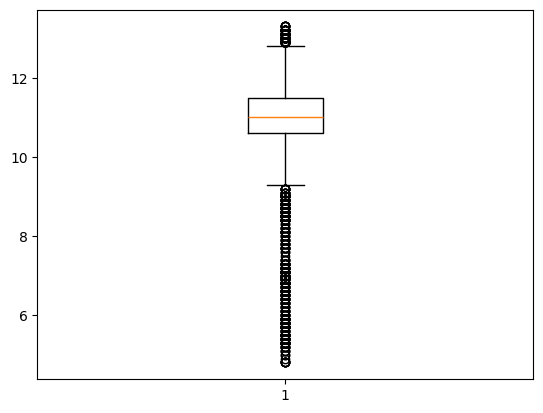

In [36]:
# Boxplot: Visualise the distribution of a continuous variable
plt.boxplot(df['battery_life'])
plt.show()

<br> <b>E. Getting rid of outliers using Normalization

<b>E1. Z-Score</b><br>
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
We will use Z-score function defined in scipy library to detect the outliers.

In [27]:
!pip3 install scipy --quiet

In [37]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(num_df))
print("z score -" , z)

z score -            temp  turbidity  wave_height  wave_period  battery_life
0      0.279014   0.108744     0.124480     0.124416      2.122692
1      1.478580   0.107251     0.124482     0.124498      1.764536
2      1.142917   0.035623     0.124487     0.124663      2.122692
3      0.942365   0.106356     0.124485     0.124498      0.857516
4      1.478580   0.043681     0.124497     0.124498      1.116665
...         ...        ...          ...          ...           ...
34912  0.159855   0.066065     0.124488     0.124416      0.697375
34913  0.130066   0.143961     0.124488     0.124416      0.697375
34914  0.874809   0.143961     0.124488     0.124416      0.697375
34915  0.517332   0.660967     0.124488     0.124416      2.122692
34916  0.576912   0.678277     0.124488     0.124416      2.122692

[34917 rows x 5 columns]


In [38]:
# remove outliers
num_df = num_df[(z < 3).all(axis=1)]

In [71]:
num_df.shape

(33913, 5)

<b>E2. IQR score </b><br>
Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data. The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [32]:
num_df

,temp,turbidity,wave_height,wave_period,battery_life
0,20.3,1.18,0.080,3.0,9.4
1,14.4,1.23,0.111,4.0,12.4
2,23.2,3.63,0.174,6.0,9.4
3,16.2,1.26,0.147,4.0,11.7
4,14.4,3.36,0.298,4.0,11.9
...,...,...,...,...,...
34912,19.9,2.61,0.187,3.0,10.5
34913,19.8,0.00,0.187,3.0,10.5
34914,22.3,0.00,0.187,3.0,10.5
34915,21.1,26.97,0.187,3.0,9.4


In [39]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

temp            4.900
turbidity       1.800
wave_height     0.091
wave_period     1.000
battery_life    0.900
dtype: float64


In [41]:
num_df = num_df[~((num_df < (Q1 - 1.5 * IQR)) |(num_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#num_df.shape
num_df

,temp,turbidity,wave_height,wave_period,battery_life
0,20.3,1.18,0.080,3.0,9.4
1,14.4,1.23,0.111,4.0,12.4
3,16.2,1.26,0.147,4.0,11.7
4,14.4,3.36,0.298,4.0,11.9
5,14.5,2.72,0.306,3.0,11.9
...,...,...,...,...,...
34910,19.5,2.47,0.187,3.0,10.5
34911,19.8,2.39,0.187,3.0,10.5
34912,19.9,2.61,0.187,3.0,10.5
34913,19.8,0.00,0.187,3.0,10.5


In [42]:
df

,beach_name,beach_name,timestamp,temp,turbidity,wave_height,wave_period,battery_life
0,0,0,2013-08-30 08:00:00,20.3,1.18,0.080,3.0,9.4
1,2,2,2016-05-26 13:00:00,14.4,1.23,0.111,4.0,12.4
2,1,1,2013-09-03 16:00:00,23.2,3.63,0.174,6.0,9.4
3,1,1,2014-05-28 12:00:00,16.2,1.26,0.147,4.0,11.7
4,0,0,2014-05-28 12:00:00,14.4,3.36,0.298,4.0,11.9
...,...,...,...,...,...,...,...,...
34912,2,2,2017-09-12 12:00:00,19.9,2.61,0.187,3.0,10.5
34913,2,2,2017-09-12 13:00:00,19.8,0.00,0.187,3.0,10.5
34914,2,2,2017-09-12 15:00:00,22.3,0.00,0.187,3.0,10.5
34915,2,2,2017-09-12 17:00:00,21.1,26.97,0.187,3.0,9.4


In [43]:
merged_df = df.merge(num_df, how = 'inner', on = ['temp','turbidity','wave_height','wave_period', 'battery_life'])
df=merged_df
df.shape

(25500, 8)

In [44]:
df

,beach_name,beach_name,timestamp,temp,turbidity,wave_height,wave_period,battery_life
0,0,0,2013-08-30 08:00:00,20.3,1.18,0.080,3.0,9.4
1,2,2,2016-05-26 13:00:00,14.4,1.23,0.111,4.0,12.4
2,1,1,2014-05-28 12:00:00,16.2,1.26,0.147,4.0,11.7
3,0,0,2014-05-28 12:00:00,14.4,3.36,0.298,4.0,11.9
4,0,0,2014-05-28 13:00:00,14.5,2.72,0.306,3.0,11.9
...,...,...,...,...,...,...,...,...
25495,2,2,2017-09-12 10:00:00,19.5,2.47,0.187,3.0,10.5
25496,2,2,2017-09-12 11:00:00,19.8,2.39,0.187,3.0,10.5
25497,2,2,2017-09-12 12:00:00,19.9,2.61,0.187,3.0,10.5
25498,2,2,2017-09-12 13:00:00,19.8,0.00,0.187,3.0,10.5


In [45]:
df.describe()

,beach_name,beach_name,temp,turbidity,wave_height,wave_period,battery_life
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,1.892627,1.892627,19.539388,1.397026,0.159807,3.282706,11.079812
std,1.458338,1.458338,3.145281,1.097103,0.058633,0.819173,0.635854
min,0.000000,0.000000,10.100000,0.000000,0.013000,2.000000,9.300000
25%,1.000000,1.000000,17.200000,0.640000,0.114000,3.000000,10.600000
50%,2.000000,2.000000,19.700000,1.130000,0.153000,3.000000,11.000000
75%,3.000000,3.000000,22.100000,1.860000,0.187000,4.000000,11.500000
max,5.000000,5.000000,28.500000,5.160000,0.338000,5.000000,12.800000


In [80]:
# Checking outliers at 5%,25%,50%,75%,90%,95% and 99%
num_df.describe(percentiles=[0.05, .25,.5,.75,.90,.95,.99])

,temp,turbidity,wave_height,wave_period,battery_life
count,25356.000000,25356.000000,25356.000000,25356.000000,25356.000000
mean,19.539273,1.399131,0.159761,3.283365,11.080336
std,3.146698,1.098701,0.058735,0.820585,0.636366
min,10.100000,0.000000,0.013000,2.000000,9.300000
5%,14.100000,0.000000,0.079000,2.000000,10.100000
25%,17.200000,0.640000,0.114000,3.000000,10.600000
50%,19.700000,1.130000,0.153000,3.000000,11.000000
75%,22.100000,1.870000,0.187000,4.000000,11.500000
90%,23.600000,3.030000,0.241000,4.000000,11.900000
95%,24.200000,3.790000,0.276000,5.000000,12.200000


Now the values looks normally distributed.

# Exploratory Data Analysis
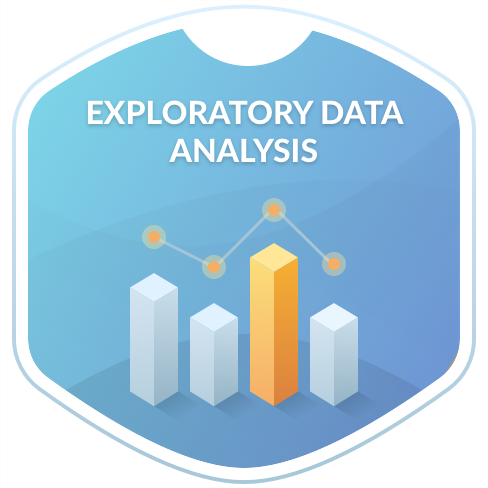

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.

Lets try to do the EDA with the set of attributes present in the beach water dataset that we have prepared. We can try following type of analysis

- Univariate Analysis - explore individual attribute
- Bivariate Analyis - explore relationship between two attributes

<b> F. Univariate Analysis

In [46]:
# Set the color coding for the visualizations to be plotted
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

C:\Users\ratho\AppData\Local\Temp\ipykernel_10584\4244043082.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')
C:\Users\ratho\AppData\Local\Temp\ipykernel_10584\4244043082.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap('Spectral')


In [47]:
df.columns

Index(['beach_name', 'beach_name', 'timestamp', 'temp', 'turbidity',
       'wave_height', 'wave_period', 'battery_life'],
      dtype='object')

<b> F1. Explore the categorical Variable

Categorical variables are variables which has finite number of string values associated with them and can be used for summarizing the data. We have converted beach_name into integer but its still categorical attribute. Same is case with wave_period as it has finite, descrete set of values associated with them. Lets explore them!

In [49]:
df

,beach_name,beach_name,timestamp,temp,turbidity,wave_height,wave_period,battery_life
0,0,0,2013-08-30 08:00:00,20.3,1.18,0.080,3.0,9.4
1,2,2,2016-05-26 13:00:00,14.4,1.23,0.111,4.0,12.4
2,1,1,2014-05-28 12:00:00,16.2,1.26,0.147,4.0,11.7
3,0,0,2014-05-28 12:00:00,14.4,3.36,0.298,4.0,11.9
4,0,0,2014-05-28 13:00:00,14.5,2.72,0.306,3.0,11.9
...,...,...,...,...,...,...,...,...
25495,2,2,2017-09-12 10:00:00,19.5,2.47,0.187,3.0,10.5
25496,2,2,2017-09-12 11:00:00,19.8,2.39,0.187,3.0,10.5
25497,2,2,2017-09-12 12:00:00,19.9,2.61,0.187,3.0,10.5
25498,2,2,2017-09-12 13:00:00,19.8,0.00,0.187,3.0,10.5


In [42]:
df=data

In [52]:
df = df[['timestamp','temp','turbidity','wave_height','wave_period', 'battery_life']]

In [55]:
df=data.merge(df, how = 'inner', on = ['temp','turbidity','wave_height','wave_period', 'battery_life'])

In [57]:
df=df[['beach_name_x','timestamp','temp','turbidity','wave_height','wave_period', 'battery_life']]

In [58]:
df

,beach_name_x,timestamp,temp,turbidity,wave_height,wave_period,battery_life
0,0,2013-08-30 08:00:00,20.3,1.18,0.080,3.0,9.4
1,2,2016-05-26 13:00:00,14.4,1.23,0.111,4.0,12.4
2,1,2014-05-28 12:00:00,16.2,1.26,0.147,4.0,11.7
3,0,2014-05-28 12:00:00,14.4,3.36,0.298,4.0,11.9
4,0,2014-05-28 13:00:00,14.5,2.72,0.306,3.0,11.9
...,...,...,...,...,...,...,...
26359,2,2017-09-12 10:00:00,19.5,2.47,0.187,3.0,10.5
26360,2,2017-09-12 11:00:00,19.8,2.39,0.187,3.0,10.5
26361,2,2017-09-12 12:00:00,19.9,2.61,0.187,3.0,10.5
26362,2,2017-09-12 13:00:00,19.8,0.00,0.187,3.0,10.5


In [59]:
df['beach_name_x'].value_counts()

beach_name_x
2    8357
1    6446
0    4803
4    2424
3    2394
5    1940
Name: count, dtype: int64

Lets visualize it!

<Axes: ylabel='beach_name_x'>

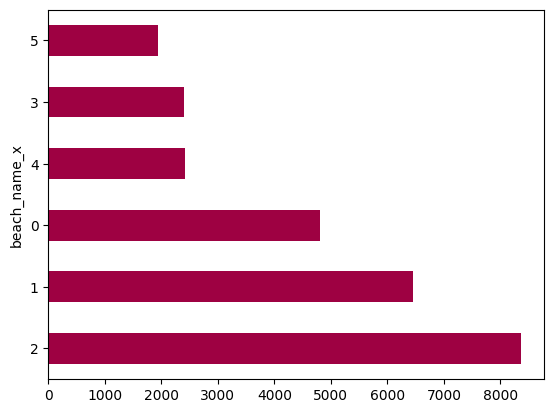

In [60]:
df['beach_name_x'].value_counts().plot.barh(cmap=cmap1)

- Beach 0 , 1 and 2 have the more number of samples collected as compared to other beaches.

In [61]:
num_df['wave_period'].value_counts()

wave_period
3.0    12709
4.0     6685
2.0     3808
5.0     2154
Name: count, dtype: int64

<Axes: ylabel='wave_period'>

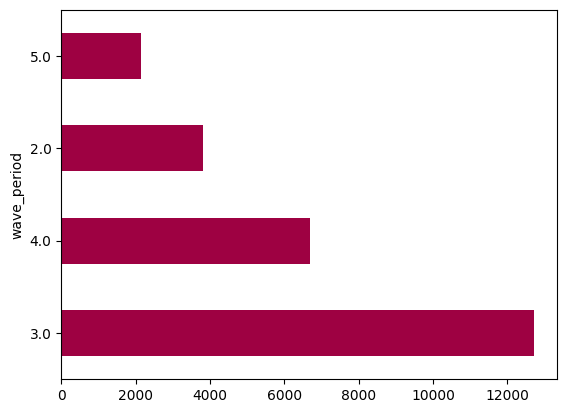

In [62]:
num_df['wave_period'].value_counts().plot.barh(cmap=cmap1)

- Majority of the samples have wave_period as 3 or 4. 

Instead of doing value count, these variable values can be normalized and visualized further.

<Axes: title={'center': 'wave period'}, ylabel='wave_period'>

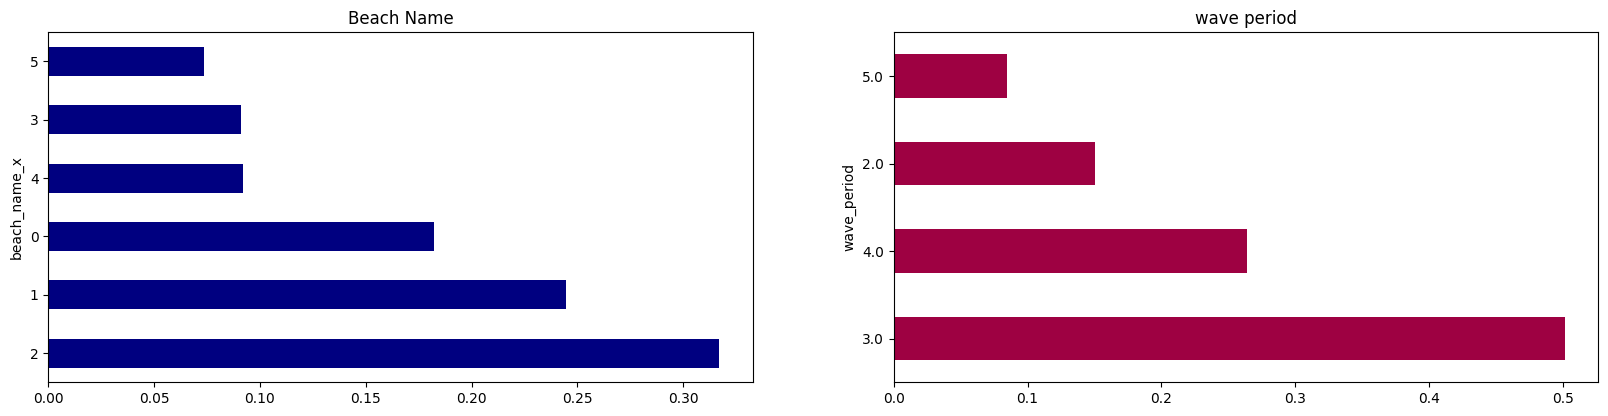

In [63]:
#Prepare a 2 by 2 layout two render these categorical attributes
plt.figure(1) 

plt.subplot(221) 
df['beach_name_x'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'Beach Name') 

plt.subplot(222) 
num_df['wave_period'].value_counts(normalize=True).plot.barh(title= 'wave period', cmap=cmap1) 

- 30% records are for beach 2 and 50% records are captured for wave_period 3.

<b>F2. Explore the numeric Variables

In [48]:
df.dtypes

Unnamed: 0          int64
beach_name          int64
timestamp          object
temp              float64
turbidity         float64
wave_height       float64
wave_period       float64
battery_life      float64
measurement_id     object
dtype: object

We have many variables available as interger or floats i.e. numerics. Lets explore them individually. But they have too many values which will not do value addition to the analysis but if distributed into ranges then some observations can be found on them.

Histograms are useful for visualising distribution of single variables.

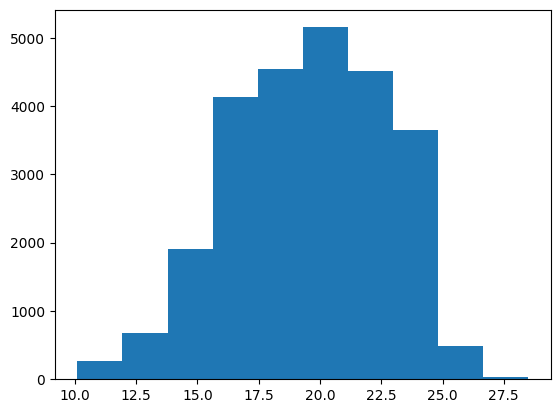

In [64]:
# Histograms
plt.hist(num_df['temp'])
plt.show()

C:\Users\ratho\AppData\Local\Temp\ipykernel_10584\1683169542.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['temp'], hist=True, kde=False);


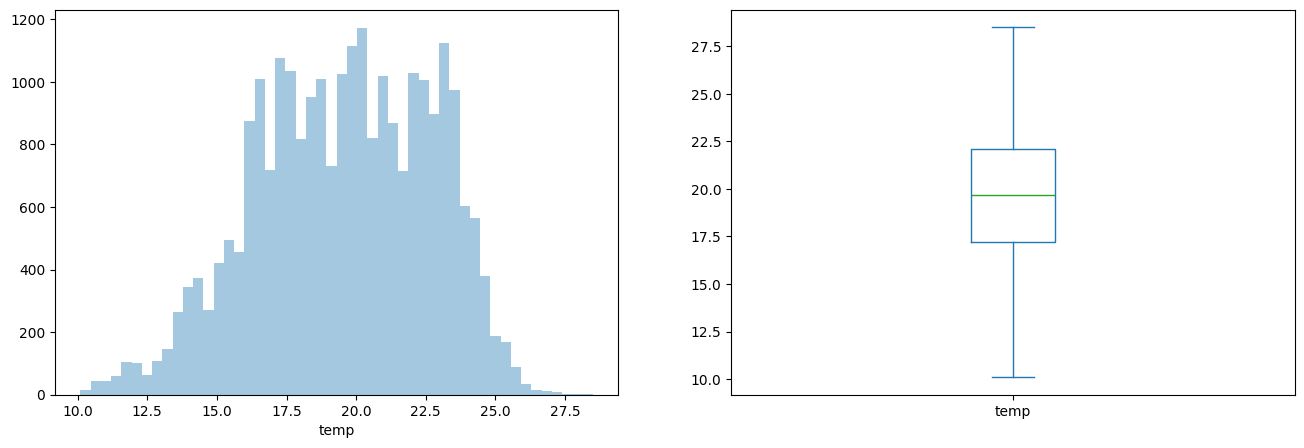

In [65]:
#Prepare a layout to render these numerical attributes
plt.figure(1) 
plt.subplot(121) 
sns.distplot(num_df['temp'], hist=True, kde=False); 

plt.subplot(122) 
num_df['temp'].plot.box(figsize=(16,5)) 
plt.show()

C:\Users\ratho\AppData\Local\Temp\ipykernel_10584\450615133.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['turbidity'], hist=True, kde=False);


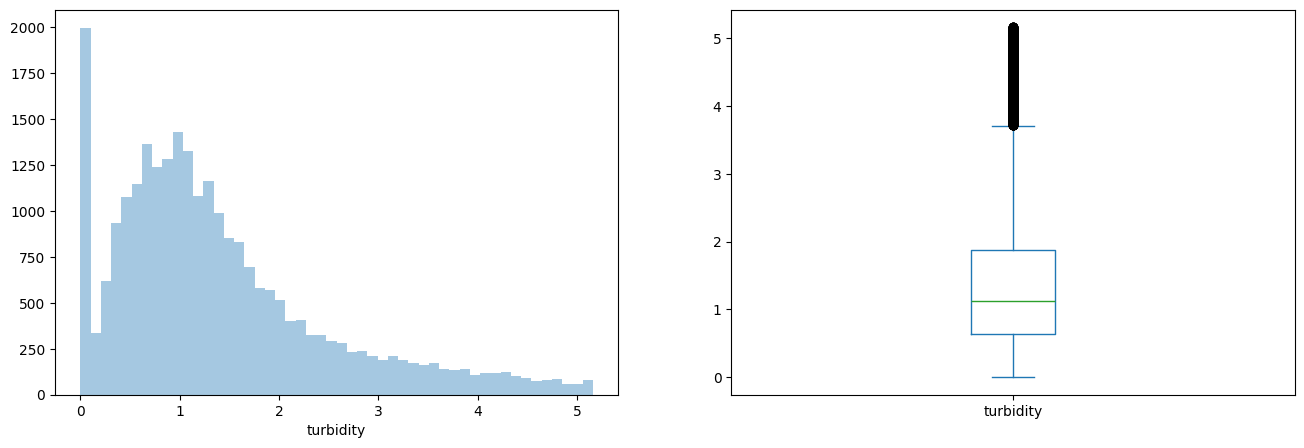

In [66]:
#Prepare a layout to render these numerical attributes
plt.figure(1) 
plt.subplot(121) 
sns.distplot(num_df['turbidity'], hist=True, kde=False); 

plt.subplot(122) 
num_df['turbidity'].plot.box(figsize=(16,5)) 
plt.show()

C:\Users\ratho\AppData\Local\Temp\ipykernel_10584\3832434451.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['wave_height'], hist=True, kde=False);


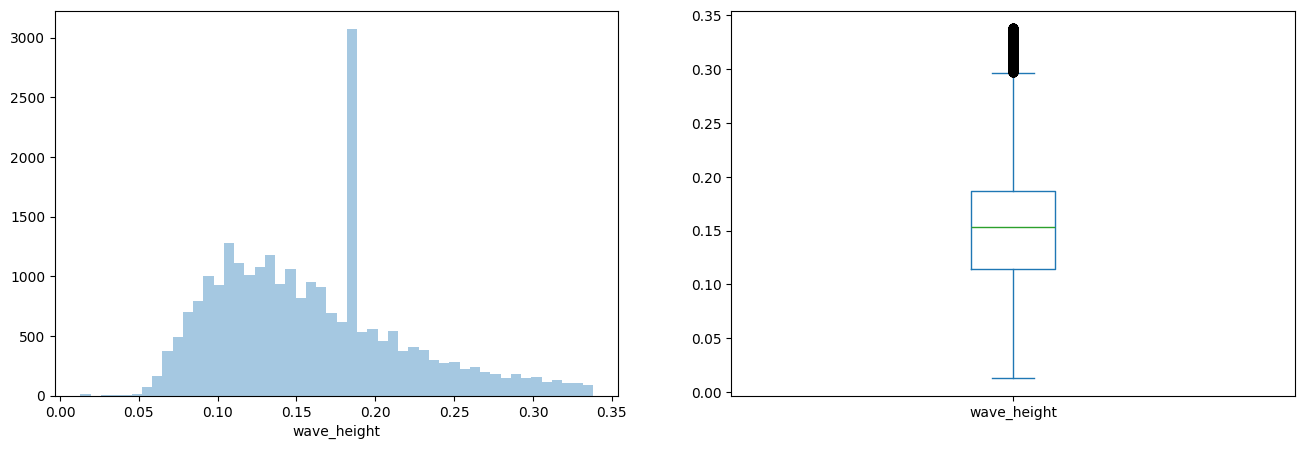

In [67]:
#Prepare a layout to render these numerical attributes
plt.figure(1) 
plt.subplot(121) 
sns.distplot(num_df['wave_height'], hist=True, kde=False); 

plt.subplot(122) 
num_df['wave_height'].plot.box(figsize=(16,5)) 
plt.show()

C:\Users\ratho\AppData\Local\Temp\ipykernel_10584\277361658.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['battery_life'], hist=True, kde=False);


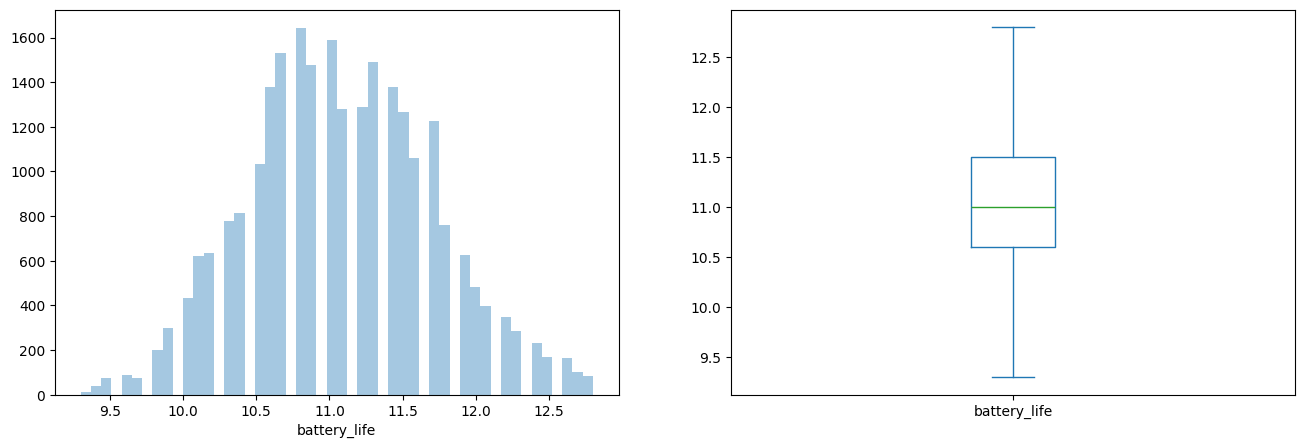

In [68]:
#Prepare a layout to render these numerical attributes
plt.figure(1) 
plt.subplot(121) 
sns.distplot(num_df['battery_life'], hist=True, kde=False); 

plt.subplot(122) 
num_df['battery_life'].plot.box(figsize=(16,5)) 
plt.show()

Observations <br>
- turbidity and wave_height needs to be diagnosed further for the spike thats shown in their distribution.

<b>G. Bivariate Analysis

Lets compare the pair of the variables

<b> G1. Comparing Categorical Variables

Categorical scatterplots:

- stripplot() (with kind="strip"; the default)
- swarmplot() (with kind="swarm")

Categorical distribution plots:

- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")

Categorical estimate plots:

- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")

<b> G1.1 Barplots

Lets explore relationship between 'beach_name' and 'wave_period'.

In [95]:
merged_df = df.merge(num_df, how = 'inner', on = ['temp','turbidity','wave_height','wave_period', 'battery_life'])

In [96]:
merged_df.shape

(25500, 9)

In [98]:
df=merged_df

In [71]:
df_cross = pd.crosstab(df['beach_name_x'],df['wave_period'])
df_cross

wave_period,2.0,3.0,4.0,5.0
beach_name_x,,,,
0,414,2241,1575,573
1,1878,2626,1444,498
2,773,5737,1425,422
3,188,982,909,315
4,403,1170,702,149
5,166,807,728,239


Lets overlay the wave_period on the beach_name

<Axes: ylabel='beach_name_x'>

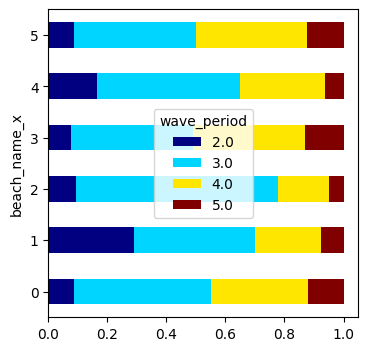

In [72]:
df_cross.div(df_cross.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(4,4))

- Majority of the samples belong to wave_period 3 across the beaches.

Lets reverse it and see the observation.

In [74]:
df_cross = pd.crosstab(df['wave_period'],df['beach_name_x'])
df_cross

beach_name_x,0,1,2,3,4,5
wave_period,,,,,,
2.0,414,1878,773,188,403,166
3.0,2241,2626,5737,982,1170,807
4.0,1575,1444,1425,909,702,728
5.0,573,498,422,315,149,239


<Axes: xlabel='wave_period'>

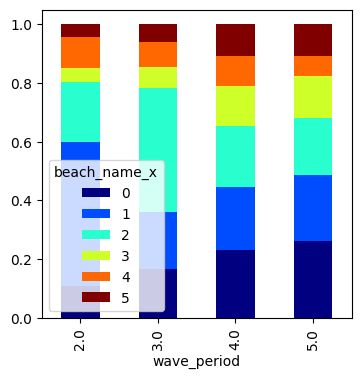

In [75]:
df_cross.div(df_cross.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(4,4))

- Majority of samples are coming from beach 1.

<b>G1.2. Categorical scatter plots

C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

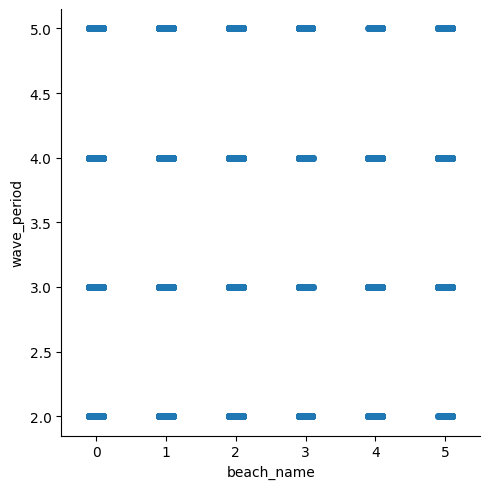

In [103]:
sns.catplot(data=df, x="beach_name", y="wave_period");

Lets explore the other variations of this plot.

In [104]:
#sns.catplot(data=df, x="beach_name", y="wave_period", kind="swarm");

In [ ]:
#sns.catplot(data=df, x="beach_name", y="temp", hue="wave_period", kind="swarm");

<b>G1.3. Categorical distribution plots

C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

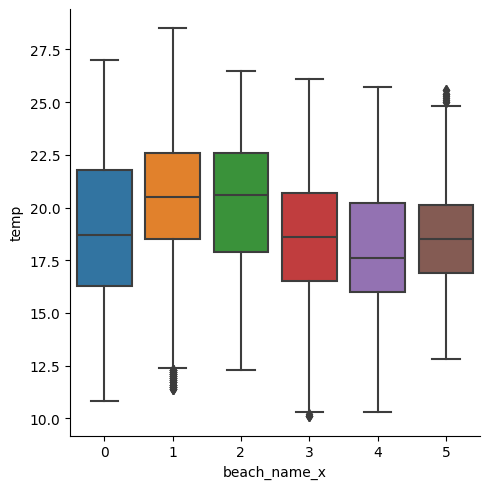

In [76]:
sns.catplot(data=df, x="beach_name_x", y="temp",kind="box");

- Beach 1 , 3 and 5 shows some values at extreme ends as well

C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

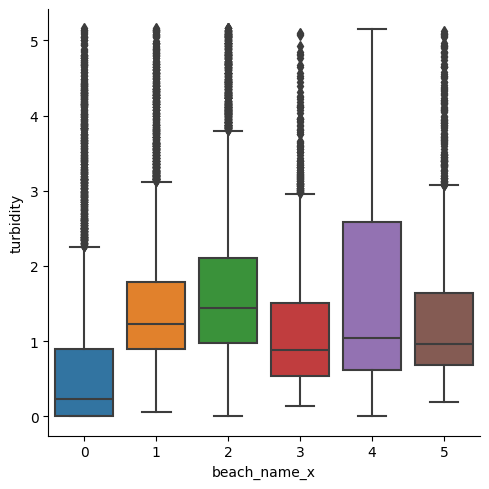

In [78]:
sns.catplot(data=df, x="beach_name_x", y="turbidity",kind="box");

- Across all beaches turbidity values have some extremes.

C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

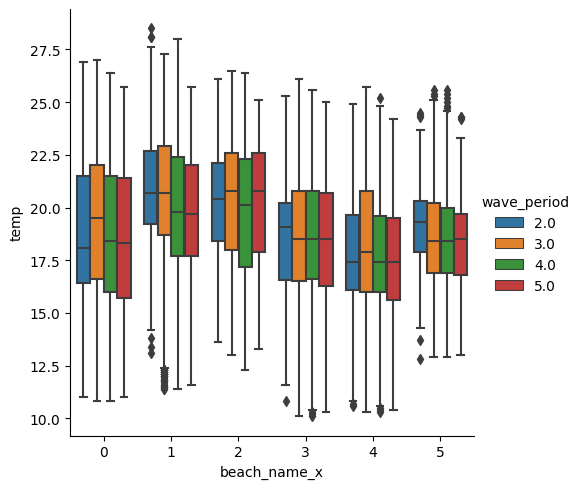

In [79]:
sns.catplot(data=df, x="beach_name_x", y="temp", hue="wave_period", kind="box");

- Extreme temp values are seen on beach 1 when wave_period has values 2 and 3.
- Extream temp values are seen on all beaches when wave_period = 2

C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ratho\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

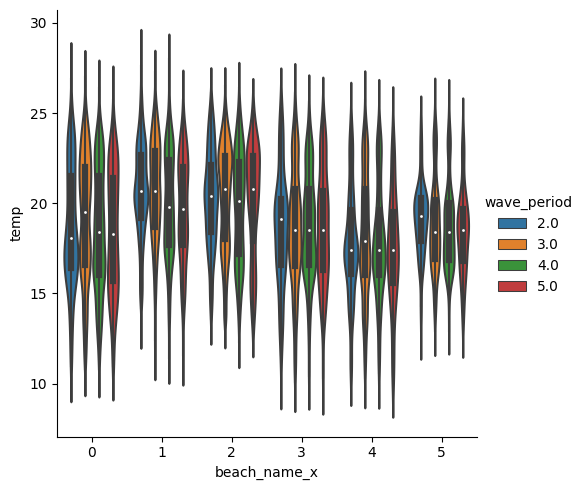

In [80]:
#Another variation of the same
sns.catplot(data=df, x="beach_name_x", y="temp", hue="wave_period", kind="violin");

<b>G1.4. Categorical estimate plots

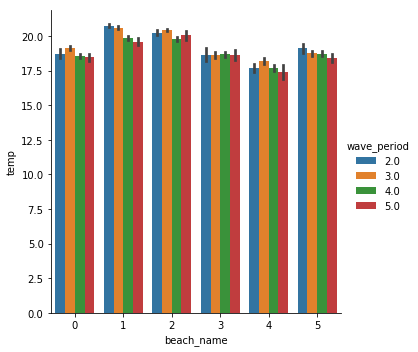

In [80]:
sns.catplot(data=df, x="beach_name", y="temp", hue="wave_period", kind="bar");

<b> G2. Comparing Numeric Variables

<b> G2.1 Using scatterplots

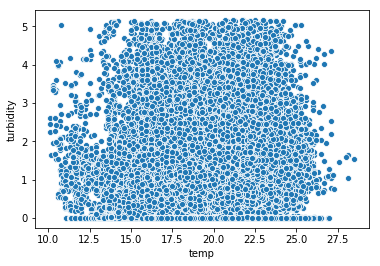

In [83]:
sns.scatterplot(x="temp", y="turbidity", data=df)

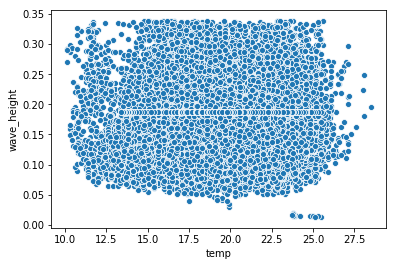

In [84]:
sns.scatterplot(x="temp", y="wave_height", data=df)

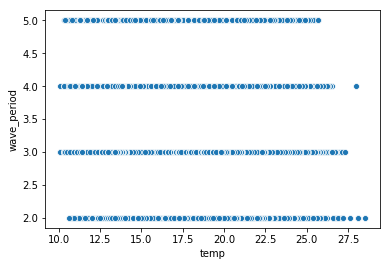

In [85]:
sns.scatterplot(x="temp", y="wave_period", data=df)

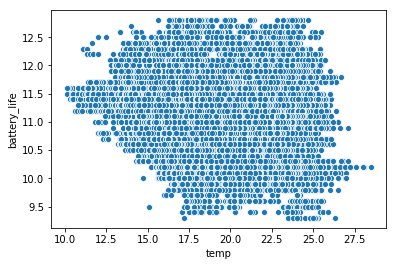

In [86]:
sns.scatterplot(x="temp", y="battery_life", data=df)

- Nothing much coming out these graphs but we can compare the other pair of varibales as well to see if something meaningful comes out of it.

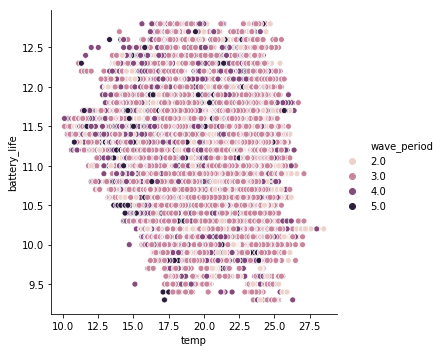

In [87]:
sns.relplot(x="temp", y="battery_life", hue="wave_period", data=df)

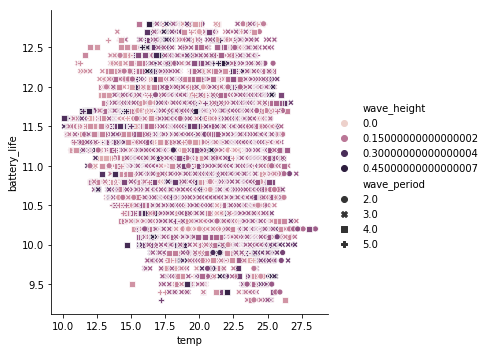

In [89]:
sns.relplot(x="temp", y="battery_life", hue="wave_height", style="wave_period", data=df)

- when are trying to impose many attributes on graphs, its becoming difficult to interpret it

<b>G2.2 Using Line Plots

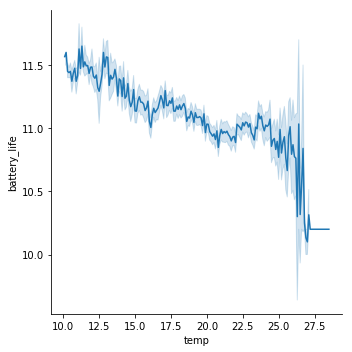

In [90]:
graph = sns.relplot(x="temp", y="battery_life", kind="line", data=df)

- battery life decreases with increase in temp

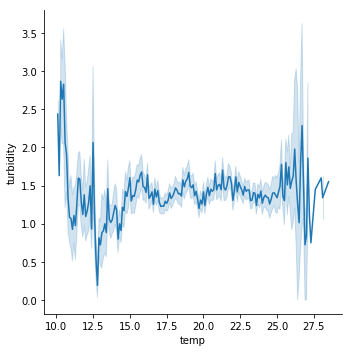

In [91]:
graph = sns.relplot(x="temp", y="turbidity", kind="line", data=df)

- turibidity alters a lot when temp is less than 13 and more than 25

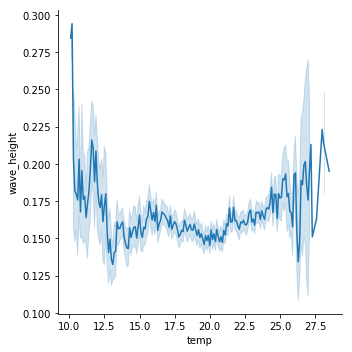

In [92]:
graph = sns.relplot(x="temp", y="wave_height", kind="line", data=df)

- wave_height alters a lot when temp is less than 13 and more than 25
- wave_height and turbidity shows similar behaviour wrt temp

Lets explore it wrt beach_name

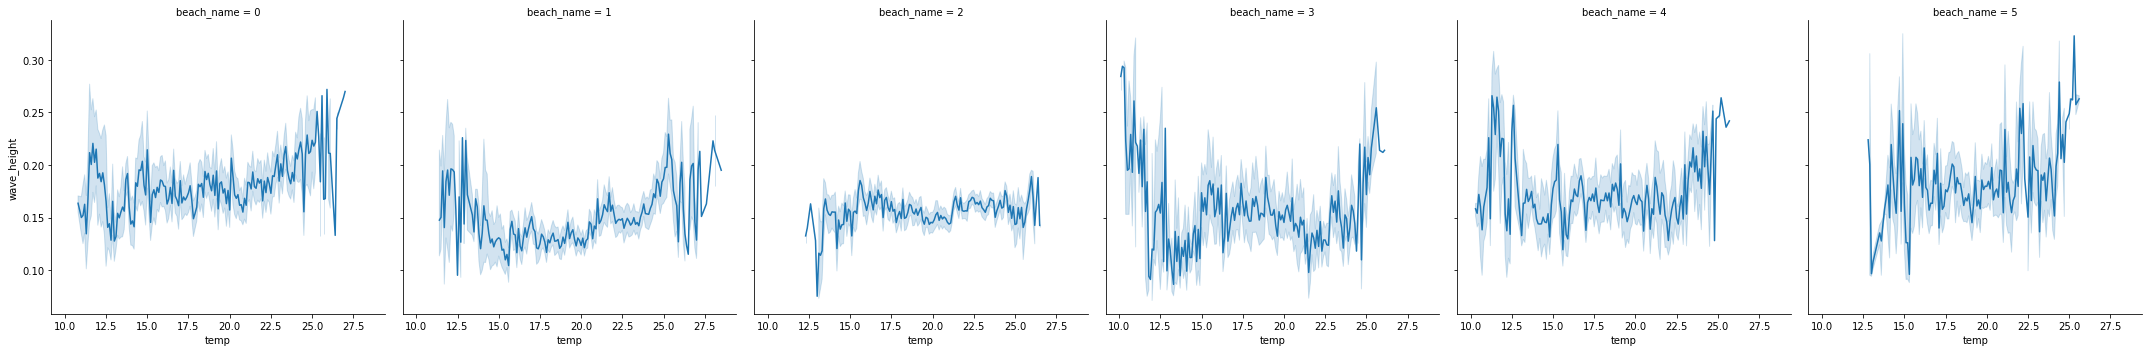

In [94]:
graph = sns.relplot(x="temp", y="wave_height", col="beach_name", kind="line", data=df)

- Beach 4 shows lot of variations wrt wave_height

<b>G2.3 Plotting bivariate distributions

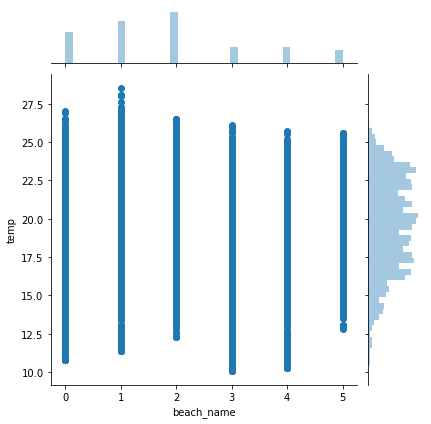

In [82]:
#jointplot
sns.jointplot(data=df, x="beach_name", y="temp");

<b>G2.4 Visualizing pairwise relationships in a dataset

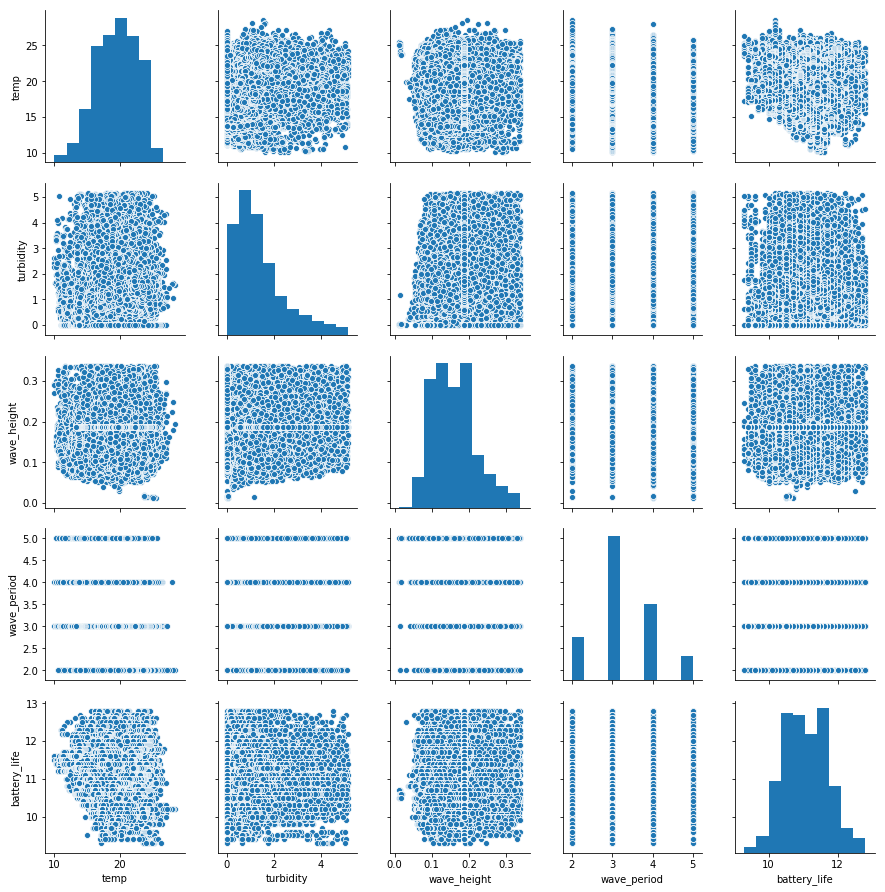

In [96]:
sns.pairplot(num_df);

<b> G2.5 Plotting datetimes

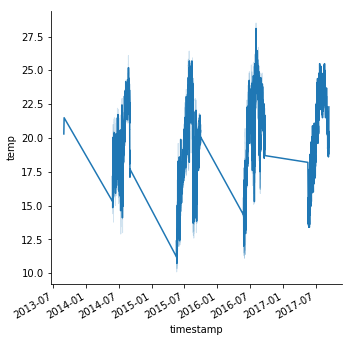

In [99]:
df.timestamp = pd.to_datetime(df.timestamp)
graph = sns.relplot(data=df, x="timestamp", y="temp", kind="line");
graph.fig.autofmt_xdate()

<b> H. Using Correlations

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

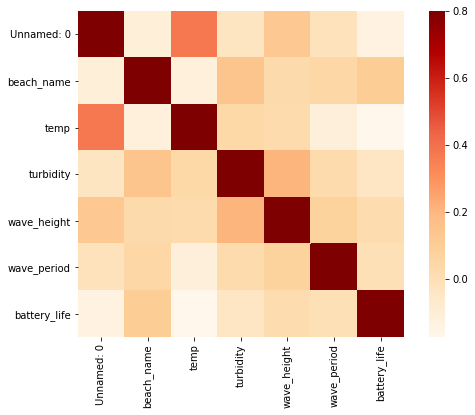

In [100]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="OrRd");

- wave_height and turbidity shows some correlation
- Other Varibales are not much correlated